In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Load the Data

In [2]:
file_name = 'train set.csv'
train = pd.read_csv(file_name,encoding = "ISO-8859-1")

In [3]:
train.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume
0,02-Jan-2009,902.99,931.80,934.73,899.35,4048270080
1,05-Jan-2009,929.17,927.45,936.63,919.53,5413910016
2,06-Jan-2009,931.17,934.70,943.85,927.28,5392620032
3,07-Jan-2009,927.45,906.65,927.45,902.37,4704940032
4,08-Jan-2009,905.73,909.73,910.00,896.81,4991549952


In [4]:
file_name = 'test set.csv'
test = pd.read_csv(file_name,encoding = "ISO-8859-1")

In [5]:
test.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume
0,02-Jan-2018,2683.73,2695.81,2695.89,2682.36,1846463232
1,03-Jan-2018,2697.85,2713.06,2714.37,2697.77,2090595328
2,04-Jan-2018,2719.31,2723.99,2729.29,2719.07,2100767744
3,05-Jan-2018,2731.33,2743.15,2743.45,2727.92,1918869120
4,08-Jan-2018,2742.67,2747.71,2748.51,2737.60,1894823936


# Prepare the Data

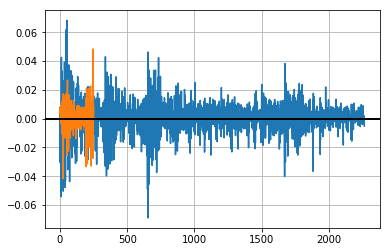

In [6]:
close = train['Close Price']
train['log_change'] = np.log(close.shift(-1)) - np.log(close)
train.log_change.plot(grid=True).axhline(y=0, color='black', lw=2)

close = test['Close Price']
test['log_change'] = np.log(close.shift(-1)) - np.log(close)
test.log_change.plot(grid=True).axhline(y=0, color='black', lw=2)

In [7]:
train.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume,log_change
0,02-Jan-2009,902.99,931.80,934.73,899.35,4048270080,-0.004679
1,05-Jan-2009,929.17,927.45,936.63,919.53,5413910016,0.007787
2,06-Jan-2009,931.17,934.70,943.85,927.28,5392620032,-0.030469
3,07-Jan-2009,927.45,906.65,927.45,902.37,4704940032,0.003391
4,08-Jan-2009,905.73,909.73,910.00,896.81,4991549952,-0.021533


In [8]:
test.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume,log_change
0,02-Jan-2018,2683.73,2695.81,2695.89,2682.36,1846463232,0.006378
1,03-Jan-2018,2697.85,2713.06,2714.37,2697.77,2090595328,0.004021
2,04-Jan-2018,2719.31,2723.99,2729.29,2719.07,2100767744,0.007009
3,05-Jan-2018,2731.33,2743.15,2743.45,2727.92,1918869120,0.001661
4,08-Jan-2018,2742.67,2747.71,2748.51,2737.60,1894823936,0.001302


In [9]:
def mapping(x):
    if x>0:
        return 1
    else:
        return 0
train['price_change']=train['log_change'].apply(mapping)
test['price_change']=test['log_change'].apply(mapping)
test.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume,log_change,price_change
0,02-Jan-2018,2683.73,2695.81,2695.89,2682.36,1846463232,0.006378,1
1,03-Jan-2018,2697.85,2713.06,2714.37,2697.77,2090595328,0.004021,1
2,04-Jan-2018,2719.31,2723.99,2729.29,2719.07,2100767744,0.007009,1
3,05-Jan-2018,2731.33,2743.15,2743.45,2727.92,1918869120,0.001661,1
4,08-Jan-2018,2742.67,2747.71,2748.51,2737.60,1894823936,0.001302,1


In [10]:
train = train.drop(columns=['log_change'])
test = test.drop(columns=['log_change'])

In the begining, we choose two features to do the classification task.

In [11]:
train = train.drop(columns=['High Price','Low Price','Volume','Date'])
test = test.drop(columns=['High Price','Low Price','Volume','Date'])

In [12]:
x_train = train.loc[:,train.columns !='price_change']
y_train = train['price_change']
x_test = test.loc[:,test.columns !='price_change']
y_test = test['price_change']

用今天的價格預測明天的漲跌，因此將最後一行row drop

In [13]:
x_train.count()

Open Price     2264
Close Price    2264
dtype: int64

In [14]:
x_test.count()

Open Price     252
Close Price    252
dtype: int64

In [15]:
x_train = x_train.drop(x_train.index[2263])
x_test = x_test.drop(x_test.index[251])
y_train = y_train.drop(y_train.index[2263])
y_test = y_test.drop(y_test.index[251])

In [16]:
x_train.head()

,Open Price,Close Price
0,902.99,931.80
1,929.17,927.45
2,931.17,934.70
3,927.45,906.65
4,905.73,909.73


In [17]:
x_test.head()

,Open Price,Close Price
0,2683.73,2695.81
1,2697.85,2713.06
2,2719.31,2723.99
3,2731.33,2743.15
4,2742.67,2747.71


# Import package for svm

In [18]:
from sklearn.preprocessing import StandardScaler

# Standardization

In [19]:
ss = StandardScaler()
ss.fit(x_train)

x_train_std = ss.transform(x_train)
x_test_std = ss.transform(x_test)

# Import svm model in the sklearn

In [20]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [21]:
penalty = 0.05

In [27]:
svm = SVC(C=penalty,kernel='linear')
svm.fit(x_train,y_train.values)

acc_train = accuracy_score(y_train.values, svm.predict(x_train)) 
acc_test = accuracy_score(y_test.values, svm.predict(x_test)) 
print("Penalty = %s, Train accuracy = %s, Test accuracy = %s" % (penalty, acc_train, acc_test))

Penalty = 10, Train accuracy = 0.5457357490057446, Test accuracy = 0.5179282868525896


In [23]:
svm.predict(x_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [24]:
penalty = 10

In [28]:
svm = SVC(C=penalty,kernel='linear')
svm.fit(x_train,y_train.values)

acc_train = accuracy_score(y_train.values, svm.predict(x_train)) * 100
acc_test = accuracy_score(y_test.values, svm.predict(x_test)) * 100
print("Penalty = %s, Train accuracy = %s, Test accuracy = %s" % (penalty, acc_train, acc_test))

Penalty = 10, Train accuracy = 54.573574900574464, Test accuracy = 51.79282868525896


In [26]:
svm.predict(x_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int64)